## This project intends to create a Risk Analysis Library to help managers making better decisions about what is the best financial asset to invest in.

In [1]:
import numpy as np # Library used for Linear Algebra
import pandas as pd # Library used for manipulate DataSets
import yfinance as yf # Library used for import finance data
import plotly.express as px  # Library used for plot interactive graphic
from scipy.stats import norm # Library used to Inferene statistics

class AssetsAnalytics():
    
    def __init__ (self,asset = ['MXRF11.SA'],start = '2019-01-01',end = '2021-06-12',show = False):
        
        self.asset = asset
        self.start = start
        self.end = end
        self.show = show
        
        data = yf.download(self.asset, 
                          start = self.start, 
                          end= self.end,
                          progress=False,show = False)['Adj Close']
        
        data = pd.DataFrame(data)
        data.dropna(inplace = True)
        
        if self.show is True:
            print('\n          FIRST FIVE LINES\n\n')
            print(data.head())
            print('\n','-='*30,'\n')
            print('\n          LAST FIVE LINES\n\n')
            print(data.tail())
        else:
            pass
    
    def Per_Var(self):
        data = yf.download(self.asset, 
                          start = self.start, 
                          end= self.end, 
                          progress=False,inplace = False)['Adj Close']
        
        data = pd.DataFrame(data)
        print('Percentage Variation')
        print(((data.iloc[-1,:]-data.iloc[0,:])/data.iloc[0,:])*100,'%')
        data.dropna(inplace = True)
        vp = data.copy()
        for i in data.columns[0:]:
            vp[i] = vp[i].pct_change()    
        
        x = vp.index
        
        graph_vol = px.line(vp,x = x,y = vp.columns[0:],title = 'Percentage Variation')
        graph_vol.show()
        
    def Market_Index(self):
        data = yf.download(self.asset, 
                          start = self.start, 
                          end= self.end,
                          progress=False,show = False)['Adj Close']
        data = pd.DataFrame(data)
        data.dropna(inplace = True)     
        vp = data.copy()
    
        for i in data.columns[0:]:
            vp[i] = vp[i].pct_change()

        for i in data.columns[0:]:
            vp[i] = (1 + vp[i]).cumprod()
                
        for i in vp.columns[0:]:
            vp[i] = (vp[i] - 1)*100
        
        print('The Final Result is')
        print(vp.tail(1))
        x = vp.index
        
        graph = px.line(vp,x = x,y = vp.columns[0:],title = 'Market Index')
        graph.show()
        
    def Volatility(self,window = 30):
            
        self.window = window
        data = yf.download(self.asset, 
                          start = self.start, 
                          end= self.end,
                          progress=False,show = False)['Adj Close']
        var_per = data.copy()
        for i in data.columns[0:]:
            var_per[i] = var_per[i].pct_change()
                
        for i in data.columns[0:]:
            var_per[i] = var_per[i].rolling(window=window).std() * np.sqrt(window)
            
        print('\nVolatility\n')
        print(data.std())
        x = var_per.index
        graph_vol = px.line(var_per,x = x,y = var_per.columns[0:],title = 'Volatility')
        graph_vol.show() 
        
    def Asset_Portfolio_Return(self, positions = [1000], risk_free_rate = 0.00, show = False):
        
        data = yf.download(self.asset, 
                          start = self.start, 
                          end= self.end,
                          progress=False,show = False)['Adj Close']
        data_2 = data.copy()
        
        x = 0
        for i in data.columns[0:]:   
            data[i] = data[i]*positions[x]
            x += 1
        
        if show == True:
            print('Your Position in the Beginning')
            print(data.head())
            print('Your Position at the end')
            print(data.tail())
        else:
            
            pass
        
        data = data.pct_change()
        data.dropna(how='any', inplace=True)

        print('Average Return\n')
        for i in data:
            print(f'{i} = {round(data[i].mean()*100,5)} %')
        print('\nVolatility')
        for i in data:
            print(f'{i} = {round(data[i].std()*100,3)} %')
        
        print('\nCorrelation Between Assets\n')
        print(data.corr())
        
        print('\nSharpe Rate')
        
        for i in data:
            
            average = data[i].mean()
            std = data[i].std()
            sharpe_rate = (average-risk_free_rate)/std
            
            if sharpe_rate >= 0:
                print(f'Shape Rate:{i} = {round(sharpe_rate,5)}')
            else:
                print(f'Shape Rate:{i} = Undefined')
                
        positions = list(positions)
        
        x = 0
        positions_2 = []
        for index,asset in enumerate(data): 
            
            a = positions[index] * data_2[asset].iloc[-1]
            positions_2.append(a)
            
        for index,asset in enumerate(data):
            
            data[asset] = positions_2[index] * data[asset]
        
        data['Portfolio'] = data.sum(axis = 1)
        
        print('\nSTOCK PORTFOLIO INFORMATION')
        data.dropna(how='any', inplace=True)
        
        print('\nAverage Return')
        print(round(data['Portfolio'].mean(),2))
        print('\nVolatility')
        print(round(data['Portfolio'].std(),2))
        print('\nValue - at - Risk (95%)')
        print(round(data['Portfolio'].mean()+data['Portfolio'].std()* (- norm.ppf(0.95)),2))

### Choosing what assets do you want analise

In [2]:
assets = AssetsAnalytics(asset = ['MXRF11.SA','BPFF11.SA','XFIX11.SA'],start = '2021-08-02',end = '2022-08-02',show = False)

### Basics Metrics

#### 1 - Percentage Variation

Percentage Variation
BPFF11.SA   -9.984014
MXRF11.SA   -0.048897
XFIX11.SA   -2.178220
dtype: float64 %


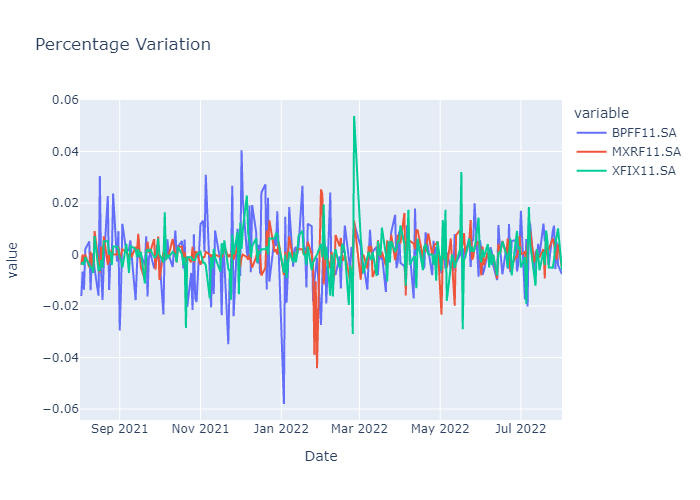

In [3]:
assets.Per_Var()

#### 2 - Volatility


Volatility

BPFF11.SA    2.830916
MXRF11.SA    0.297673
XFIX11.SA    0.223166
dtype: float64


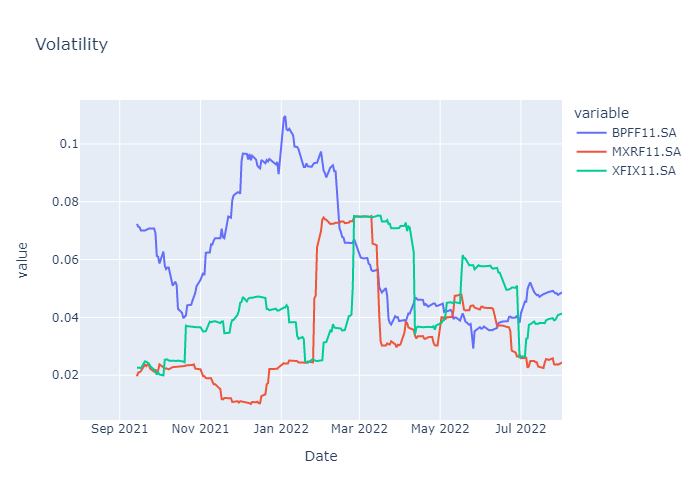

In [4]:
assets.Volatility()

#### 3 - Market Index

The Final Result is
            BPFF11.SA  MXRF11.SA  XFIX11.SA
Date                                       
2022-08-01  -9.984023  -0.048897   -2.17822


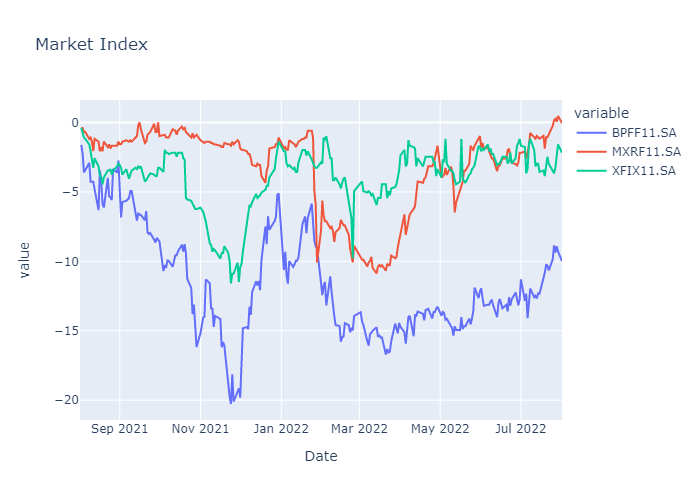

In [5]:
assets.Market_Index()

### Metrics about Portfolio

In [6]:
assets.Asset_Portfolio_Return(positions = [1000,2000,3000], risk_free_rate = 0.04, show = False)

Average Return

BPFF11.SA = -0.03539 %
MXRF11.SA = 0.00206 %
XFIX11.SA = -0.00557 %

Volatility
BPFF11.SA = 1.171 %
MXRF11.SA = 0.671 %
XFIX11.SA = 0.813 %

Correlation Between Assets

           BPFF11.SA  MXRF11.SA  XFIX11.SA
BPFF11.SA   1.000000   0.015570   0.186427
MXRF11.SA   0.015570   1.000000   0.249047
XFIX11.SA   0.186427   0.249047   1.000000

Sharpe Rate
Shape Rate:BPFF11.SA = Undefined
Shape Rate:MXRF11.SA = Undefined
Shape Rate:XFIX11.SA = Undefined

STOCK PORTFOLIO INFORMATION

Average Return
-24.28

Volatility
862.05

Value - at - Risk (95%)
-1442.22
